# Data Analysis of Strings 2021 Participants 

Here we analyze the Strings 2021 [list of participants](https://www.ictp-saifr.org/wp-content/uploads/2021/06/stringsreg616.pdf). The main challenge is to clean up the entries to properly analyze the data.

## Importing and Cleaning Data

In [4]:
import tabula
import pandas as pd
import matplotlib.pyplot as plt
import re

We use `tabula-py` to download and extract the tables from the PDF file:

In [5]:
path_to_pdf = "https://www.ictp-saifr.org/wp-content/uploads/2021/06/stringsreg616.pdf"
df_list = tabula.read_pdf(path_to_pdf, pages = "all")
#dfs_local=tabula.read_pdf("strings-table.pdf", pages = "all")

Each PDF page gives a table, so we have to clean them, adjust the columns and append them together into one big table `df_strings`:

In [6]:
## I can only run this once, because it is changing df_list in some steps. Can I fix this?
for i,df in enumerate(df_list):
    if  i == 0 :
        df_list[0].columns = df_list[0].iloc[1]   # Fix column names
        df_strings = df_list[0].drop([0,1]).reset_index(drop=True).astype({"No": int}).copy() # Create df_strings DF
        df_strings.columns.name=''
    else :
        df.loc[len(df)] = list(df.columns) # Adding column names to the bottom.
        df.columns = df_strings.columns  # Fix column names
        df_list_new = df.astype({"No": int}).sort_values('No').reset_index(drop=True).copy() # Transform 'No' column to int64, sort values in ascending order and reset indexes 
        df_strings = df_strings.append(df_list_new, ignore_index=True) # Append DF to the bottom of strings
        
df_strings = df_strings.set_index('No')
df_strings.head()

,Name,Institution,Country,Position
No,,,,
1,"Aalsma, Lars",University of Wisconsin-Madison,United States of America,Postdoc
2,"Abbasi, Navid",LZU,China,Faculty
3,"Abderrazaq, Abassi El",Ibn Tofail University,Morrocco,Graduate student
4,"Abdulhamid, Ibrahim Muhammad","Faculty of Science, Tanta University, Egypt",Egypt,Graduate student
5,"Abe, Yoshihiko",Kyoto Univ.,Japan,Graduate student


Now we want to check and clean the Countries names, as many are neither countries, nor written correctly. Some are even written in another language! Our goal is to do an accurate histogram of countries in the analysis part. First, I will capitalize the strings to make life easier.

In [9]:
df_strings.Country = df_strings.Country.apply(str.capitalize)
df_strings.Country.unique()

array(['United states of america', 'China', 'Morrocco', 'Egypt', 'Japan',
       'India', 'Italy', 'Germany', 'Usa', 'Russia', 'Belgium',
       'Argentina', 'Israel', 'United states', 'Pakistan',
       'United kingdom', 'Bangladesh', 'Netherlands', 'Colombia',
       'France', 'Bulgaria', 'Uk', 'Iran', 'Brasil', 'Brazil',
       'Saudi arabia', 'Denmark', 'Portugal', 'Uruguay', 'Chile',
       'Ecuador', 'South korea', 'Greece', 'Italia',
       'United state of america', 'Spain', 'The netherlands', 'Россия',
       'Canada', 'Australia', 'Singapore', 'Ireland', 'Angola',
       'Switzerland', 'Korea', 'Sweden', 'Perú', 'Turkey', 'South africa',
       'Mexico', 'Morocco', 'Alemania', 'Guatemala', 'Czech republic',
       'P. r. china', 'Belguim', '中国', 'Poland', 'Republic of korea',
       'Hong kong', 'Romania', 'Austria', 'Serbia', 'Czechia',
       'Licenciatura em física', 'Türkiye', 'Francia', 'Uae', 'Us',
       'Venezuela', 'Spagna', 'Ukraine', 'México', 'Thailand', 'Ghana',


In [403]:
df_strings[df_strings.Country.isin(['Sweden & denmark','The netherlands/brazil','Ca','Licenciatura em física'])]

,Name,Institution,Country,Position
No,,,,
399,"Dias, Cid Keythson",Universidade do Estado do Amazonas,Licenciatura em física,Faculty
1291,"Obers, Niels",Nordita & Niels Bohr Institute,Sweden & denmark,Faculty
1385,"Pereira, Duarte Antonio",Radboud University/Fluminense Federal University,The netherlands/brazil,Veni Fellow (Postdoc) @RU and Faculty @UFF
2051,"Zheng, Minshan",UC Davis,Ca,Graduate student


To check the country names, we load a list of all the officially recognized country names in the world:

In [24]:
country_names = pd.read_csv('countries.csv', header=0, usecols=[1], names=['Country'])
country_names.head(10)
#country_names[country_names.Country.str.match(r'^Cze*')]
#country_names[country_names.Country.str.contains('russia',flags=re.I)]

,Country
0,Afghanistan
1,Albania
2,Algeria
3,Andorra
4,Angola
5,Antigua and Barbuda
6,Argentina
7,Armenia
8,Australia
9,Austria


Now are doing an anti-join to find the non-recognizable country names:

In [25]:
country_match = df_strings.merge(country_names, on='Country', how='left', indicator=True)
not_matched_list = country_match.loc[country_match['_merge']=='left_only', 'Country']
df_strings[df_strings.Country.isin(not_matched_list)].Country.sort_values().unique()

array(['Alemania', 'Bahia', 'Belgique', 'België', 'Belguim', 'Brasil',
       'Ca', 'Cairo', 'Czech republic', 'England', 'España',
       'Estados unidos', 'Eygpt', 'Francia', 'França', 'Hong kong',
       'Hong kong china', 'Ibaraki', 'Iran', 'Italia', 'Japn', 'Korea',
       'Korea (rok)', 'Licenciatura em física', 'Melbourne', 'Morrocco',
       'México', 'Nederland', 'New york, usa', 'P. r. china',
       'Países bajos', 'Perú', 'Polska', 'R. of north macedonia',
       'Republic of korea', 'Republic of korea(south korea)', 'Roc',
       'Russia', 'Santa barbara', 'Saudi arabia', 'Scotland',
       'South africa', 'South korea', 'Spagna', 'Sweden & denmark',
       'Taiwan', 'The netherlands', 'The netherlands/brazil', 'The us',
       'Türkiye', 'U.s.', 'U.s.a.', 'Uae', 'Uk', 'United kingdom',
       'United state of america', 'United states',
       'United states of america', 'Us', 'Usa', 'Venezuela', 'Vietnam',
       'Việt nam', 'Österreich', 'Россия', '中国', '日本', '瑞典', '美国']

We want to filter and replace country names written in different forms. Later we will also check the outliers and replace city names by the respective countries and any unrecognizable string will be set as 'Other'. We can repeatedly use the following function to make a dictionary of name replacements.

In [26]:
country_replacements = {}
def replacements(regexp, country, value='match'):
    '''Creates a dictionary with pairs regexp:country with all the country replacements. Value gives type of regexp match.'''
    #for regexp, country in args:
    if value == 'match':
        country_names = list(df_strings[df_strings.Country.str.match(regexp,flags=re.I)].Country.unique())
    elif value == 'contains': 
        country_names = list(df_strings[df_strings.Country.str.contains(regexp,flags=re.I)].Country.unique())
    else :
        raise ValueError('Value must be either \'match\' or \'contains\'.')
    for name in country_names:
        country_replacements[name] = country

We define a dictionary of replacements `country_dict`, tailored by hand, and use the function `replacements` to make the substitutions in `df_strings`. _Is there an easier or more compact way to do this?_

In [28]:
country_dict = {'^Ca$': 'Other','Uae': 'United Arab Emirates','United kingdom': 'United Kingdom','Uk':'United Kingdom','美国':'United States','瑞典': 'Sweden','日本':'Japan','中国': 'China','Россия': 'Russia','Österreich': 'Austria','Việt nam': 'Vietnam','Türkiye': 'Turkey','Sweden & denmark':'Other','Spagna': 'Spain','Santa barbara': 'United States','Roc':'Taiwan','R. of north macedonia':'North Macedonia','Polska':'Poland','Perú':'Peru','Países bajos':'Netherlands','The netherlands/brazil':'Other','Nederland':'Netherlands','The netherlands':'Netherlands','Melbourne': 'Australia','The us': 'United States','New york, usa': 'United States','Morrocco':'Morocco','Licenciatura em física': 'Other','korea': ('South Korea','contains'),'Italia':'Italy','Hong kong': 'China', 'P. r. china':'China', 'Hong kong china':'China','Ibaraki': 'Japan', '^Fra*':'France','Estados unidos':'United States','España':'Spain','Cairo':'Egypt', 'Eygpt':'Egypt', r'^Bel\w+':'Belgium','Bahia': 'Brazil','Alemania':'Germany',r'^U.*s.*a*':'United States', r'^Brasil':'Brazil', r'^India':'India', r'^Japa*n*':'Japan', 'Czech republic':'Czechia'}
for key, value in country_dict.items(): 
    if type(value) == str :
        replacements(key,value)
    elif type(value) == tuple :
        replacements(key,value[0],value[1])
    else :
        raise TypeError('Dictionary values must be either strings or a tuple of size 2 (see function \'replacements\').')


We can check the list of country replacements

In [30]:
country_replacements

{'Ca': 'Other',
 'Uae': 'United Arab Emirates',
 'United kingdom': 'United Kingdom',
 'Uk': 'United Kingdom',
 'Ukraine': 'United Kingdom',
 '美国': 'United States',
 '瑞典': 'Sweden',
 '日本': 'Japan',
 '中国': 'China',
 'Россия': 'Russia',
 'Österreich': 'Austria',
 'Việt nam': 'Vietnam',
 'Türkiye': 'Turkey',
 'Sweden & denmark': 'Other',
 'Spagna': 'Spain',
 'Santa barbara': 'United States',
 'Roc': 'Taiwan',
 'R. of north macedonia': 'North Macedonia',
 'Polska': 'Poland',
 'Perú': 'Peru',
 'Países bajos': 'Netherlands',
 'The netherlands/brazil': 'Netherlands',
 'Nederland': 'Netherlands',
 'The netherlands': 'Netherlands',
 'Melbourne': 'Australia',
 'The us': 'United States',
 'New york, usa': 'United States',
 'Morrocco': 'Morocco',
 'Licenciatura em física': 'Other',
 'South korea': 'South Korea',
 'Korea': 'South Korea',
 'Republic of korea': 'South Korea',
 'Korea (rok)': 'South Korea',
 'Republic of korea(south korea)': 'South Korea',
 'Italia': 'Italy',
 'Hong kong': 'China',
 'H

and finally replace the country names

In [31]:
df_strings.Country = df_strings.Country.replace(country_replacements)

Now we can analyze the positions and institutions. It is more interesting to analyse the positions.

In [408]:
#df_strings.Position.sort_values().unique()

In [32]:
df_strings.Institution.sort_values().unique()[1:50]

array(['-', 'ABRU', 'AIUCTB', 'ANU', 'APCTP',
       'Abdul Wali Khan University', 'Ahmedabad University',
       'Ain Shams University', 'Ain Shams university',
       'Al-Azhar University', 'Albert Einstein Institute',
       'Albert-Einstein-Institute', 'Alexandria University',
       'Aligarh Muslim University', 'American Physical Society',
       'American University of Malta',
       'Amirkabir University of Technology', 'Amity University',
       'Amity University Noida', 'Amsterdam University',
       'Antofagasta University', 'Arizona State',
       'Arizona State University', 'Arnold Sommerfeld Center',
       'Ashoka University', 'Asia Pacific Center for Theoretical Physics',
       'Ateneo de Manila University', 'Auc',
       'Australian National University', 'Ave Maria University',
       'B.J.B Autonomous College, Utkal University', 'BCTP', 'BIMSA',
       'BITS PILANI', 'BITS Pilani', 'BITS-Pilani Goa Campus',
       'BLTP JINR', 'BRAC University', 'Banaras Hindu Univers

## Data Visualization



We want to visualize the countries with the largest number of participants.

In [33]:
strings_country_list = list(df_strings.Country.value_counts().index)

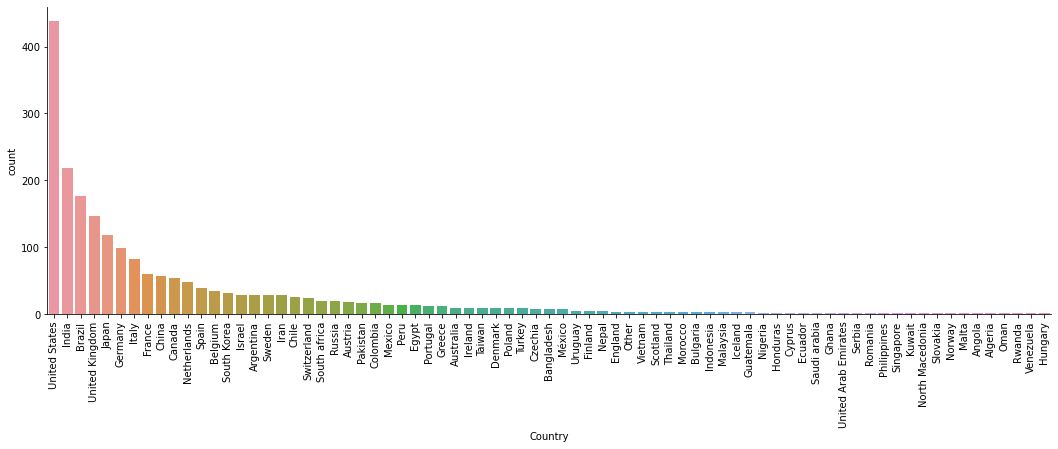

In [39]:
import seaborn as sns

sns.catplot(x='Country',data=df_strings,kind='count',order=strings_country_list,aspect=3);
#sns.set_context('talk')

plt.xticks(rotation=90)
plt.show()
# plt.clf()

There is a lot of countries. Let us check what are the top 10 countries in number of participants.

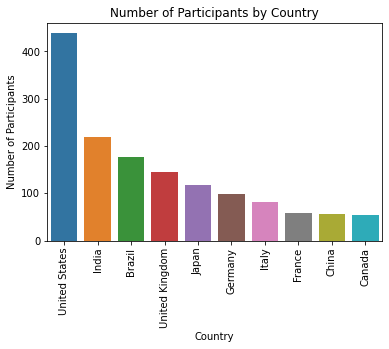

In [143]:
top10_countries = list(df_strings.Country.value_counts().head(10).index)
df_strings_top10 = df_strings[df_strings.Country.isin(top10_countries)]
g = sns.countplot(x='Country', data=df_strings_top10, order=top10_countries)

g.set(ylabel='Number of Participants')
g.set_title('Number of Participants by Country')

plt.xticks(rotation=90)
plt.show()

It looks like most strings theorists are in the US and India! Brazil was the host country, so it is not surprising to see so many people from there. But how many of those are professional physicists?

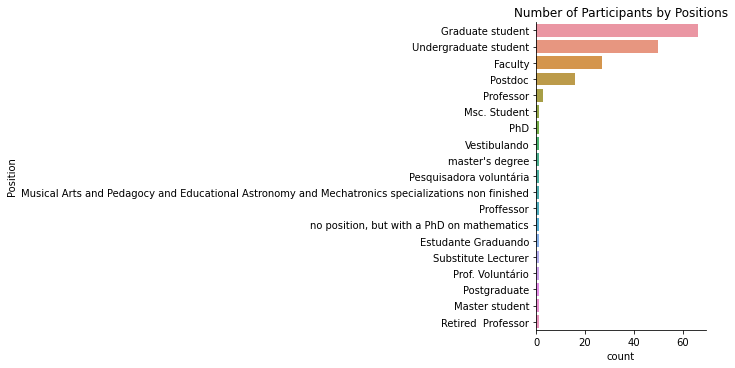

In [99]:
strings_brazil = df_strings[df_strings.Country == 'Brazil']
pos_order = strings_brazil.Position.value_counts().index
g = sns.catplot(data=strings_brazil, y='Position', kind='count', aspect=2, order=pos_order)
g.set(title='Number of Participants by Positions')

plt.show()

Most of the position names are mistakes or random and have less than 10 counts. If we discard then, we get a cleaner plot:

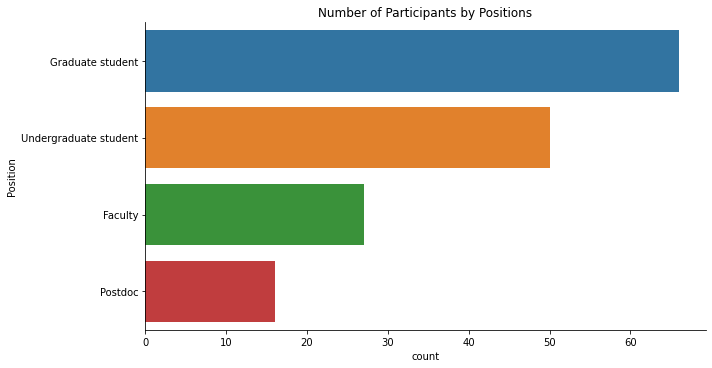

In [103]:
pos_order = strings_brazil.Position.value_counts().head(4).index
g = sns.catplot(data=strings_brazil, y='Position', kind='count', aspect=2, order=pos_order)
g.set(title='Number of Participants by Positions')

plt.show()

Most participants are either graduate or undergraduate students! This is expected in general, since there are much more students than professors in academia. However, this actually reflect the event characteristics, as very specialized scientific workshops have typically less students than professionals. 

Now, we can ask ourselves, what is the distribution of students and professionals by the top 10 countries?

# Next Steps

- Use [fuzzywuzzy](https://pypi.org/project/fuzzywuzzy/) to compare strings.
- Clean and make some plots of `positions` and `institutions`.
- Analyze correlations between `countries`, `positions` and `institutions`. 